result 1: 225


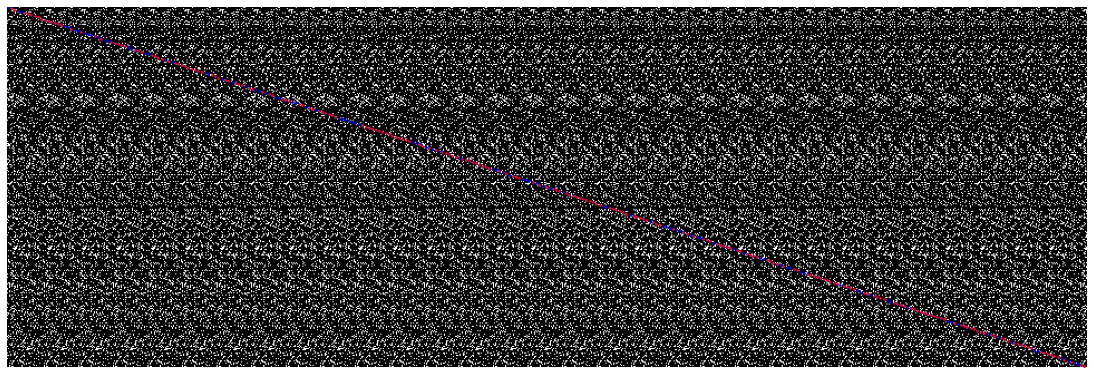

In [1]:
# ─── CHALLENGE 1 ────────────────────────────────────────────────────────────────
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

with open('input') as file:
    lines = file.read().splitlines()

height = len(lines)   # 323
width  = len(lines[0]) # (323-1)*3+1
width_target = (height-1)*7+1
extend_factor = int(np.ceil(width_target/width))

matrix = np.zeros((height,width), dtype=np.int)
for i, line in enumerate(lines):
    int_list = [1 if char == '#' else 0 for char in line]
    matrix[i,:] = np.array(int_list)

matrix_big = np.concatenate([matrix]*extend_factor, axis=1)

def create_indices(right, down):
    x_list, y_list = [], []
    x, y = 0, 0
    while y < height:
        x_list.append(x)
        y_list.append(y)
        y += down
        x += right        
    return [x_list, y_list]

def get_trees(right, down):
    coords = create_indices(right, down)
    counter = 0
    x_list_tree, y_list_tree = [], [],
    for x, y in zip(*coords):
        if matrix_big[y,x] == 1:
            counter += 1
            # for vis
            x_list_tree.append(x)
            y_list_tree.append(y)
        y += down
    return counter, coords, [x_list_tree, y_list_tree]
counter_1, coords_1, coords_trees_1 = get_trees(3,1)
print('result 1:', counter_1)

# visualization
plt.figure(figsize=(15,10))
plt.imshow(matrix_big[:,:height*3], cmap='gray')
plt.scatter(*coords_1, color='blue', s=2)
plt.scatter(*coords_trees_1, color='red', s=2)
plt.gca().axis('off')
plt.tight_layout(pad=0)


result 2: 1115775000


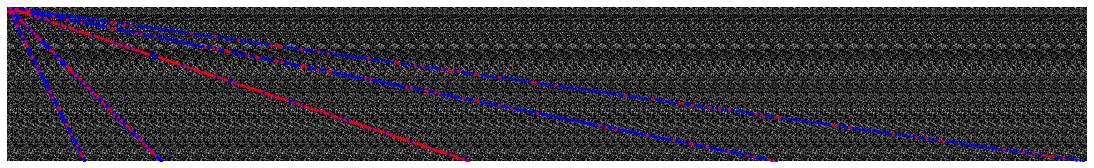

In [2]:
# ─── CHALLENGE 2 ────────────────────────────────────────────────────────────────
counter_list, coords_list, coords_trees_list = [], [], []
params = [[1,1], [3,1], [5,1], [7,1], [1,2],]
for param in params:
    counter, coords, coords_trees = get_trees(*param)
    counter_list.append(counter)
    coords_list.append(coords)
    coords_trees_list.append(coords_trees)
counter_2 = reduce(lambda x, y: x*y, counter_list)
print('result 2:', counter_2)

# visualization
plt.figure(figsize=(15,10))
plt.imshow(matrix_big, cmap='gray')
for coords in coords_list:
    plt.scatter(*coords, color='blue', s=3)
for coords in coords_trees_list:
    plt.scatter(*coords, color='red', s=3)
plt.gca().axis('off')
plt.tight_layout(pad=0)
